In [85]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm
import os

In [86]:
scenario = ['PAK', 'RUS', 'HOA', 'URU', 'ALL']

df = [ pd.read_csv(scenario[i] + '-highestLosses.csv') for i in range(len(scenario)) ]

In [87]:
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

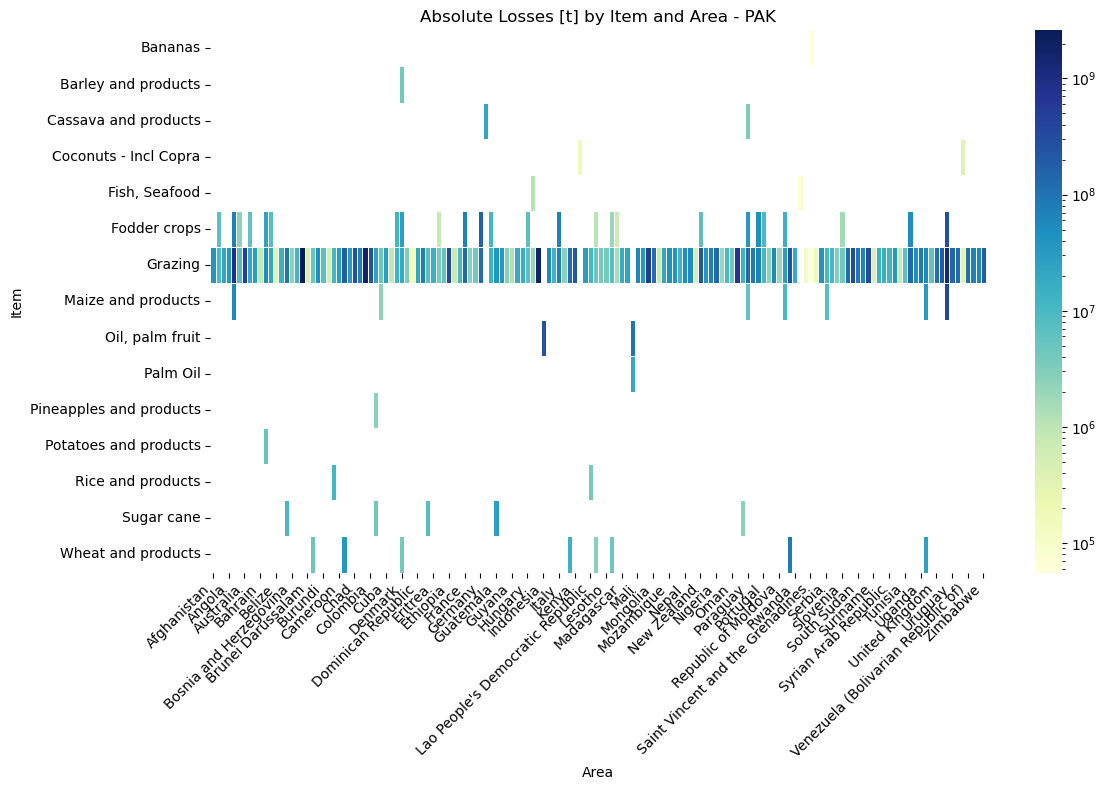

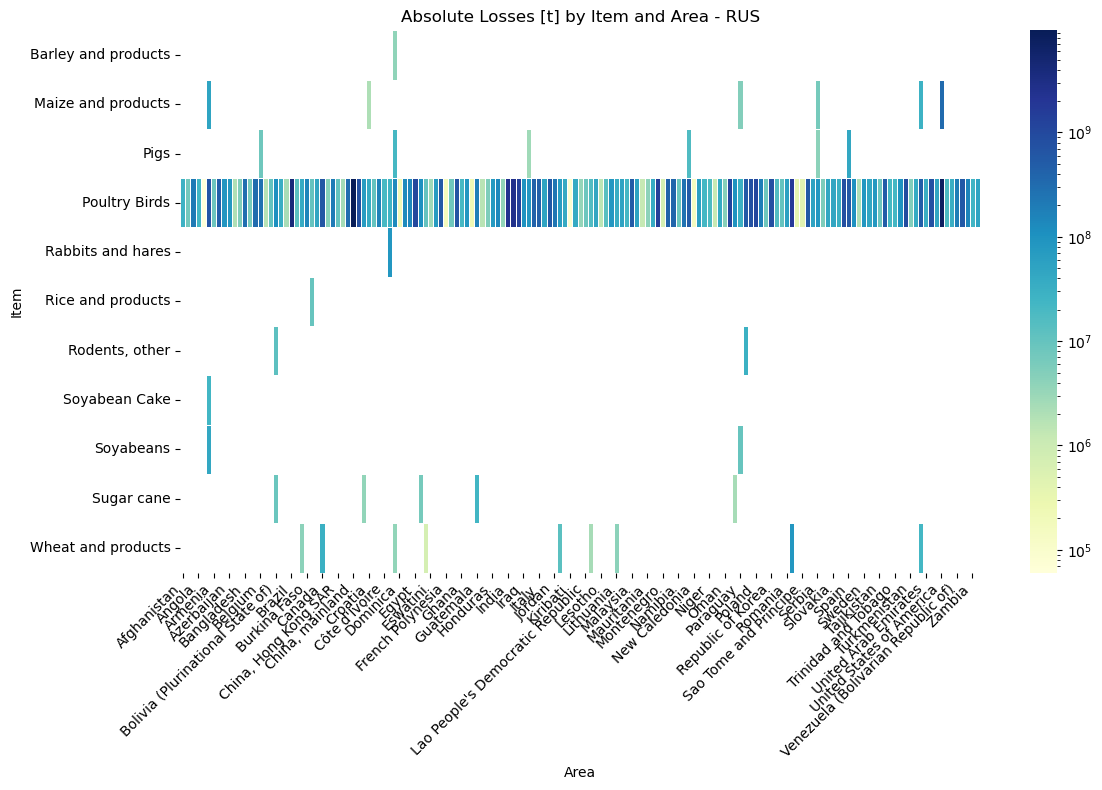

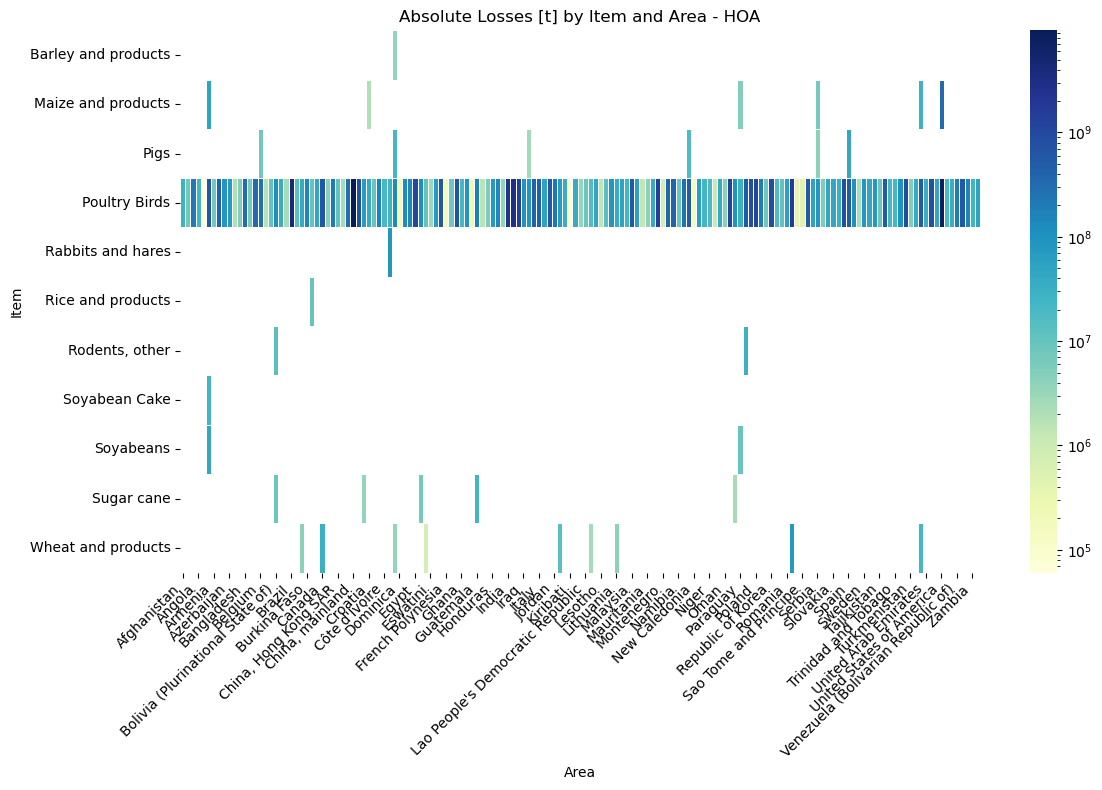

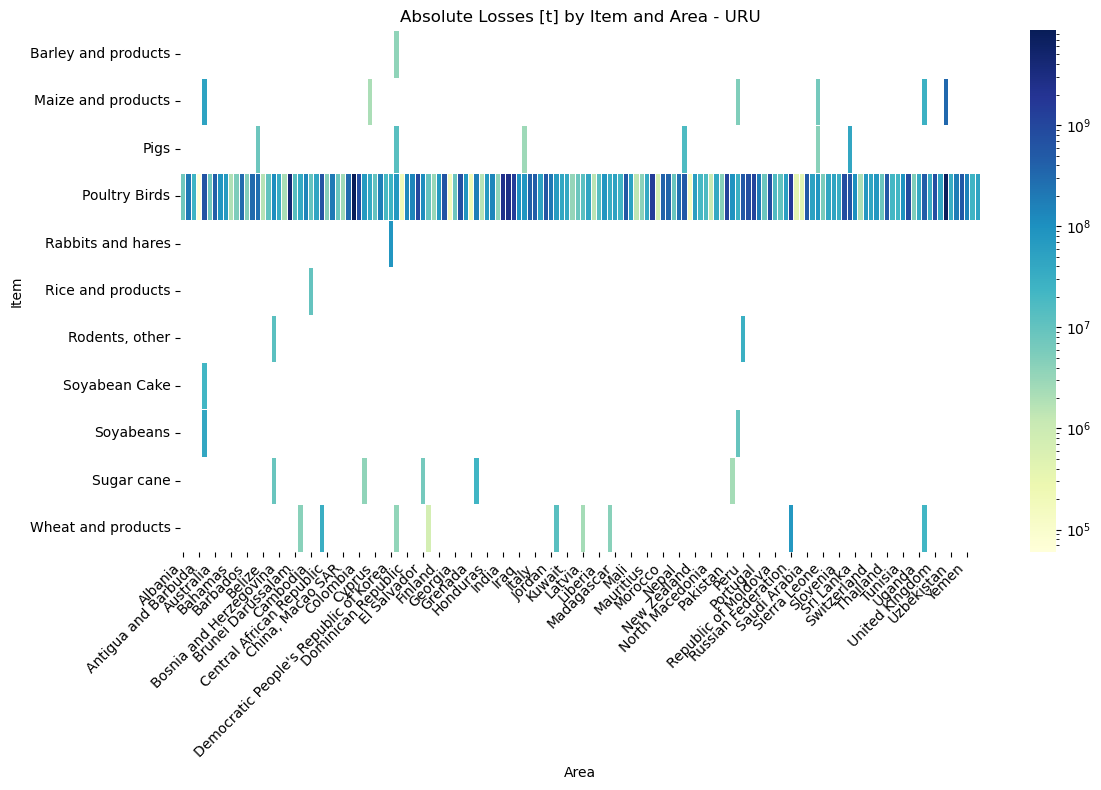

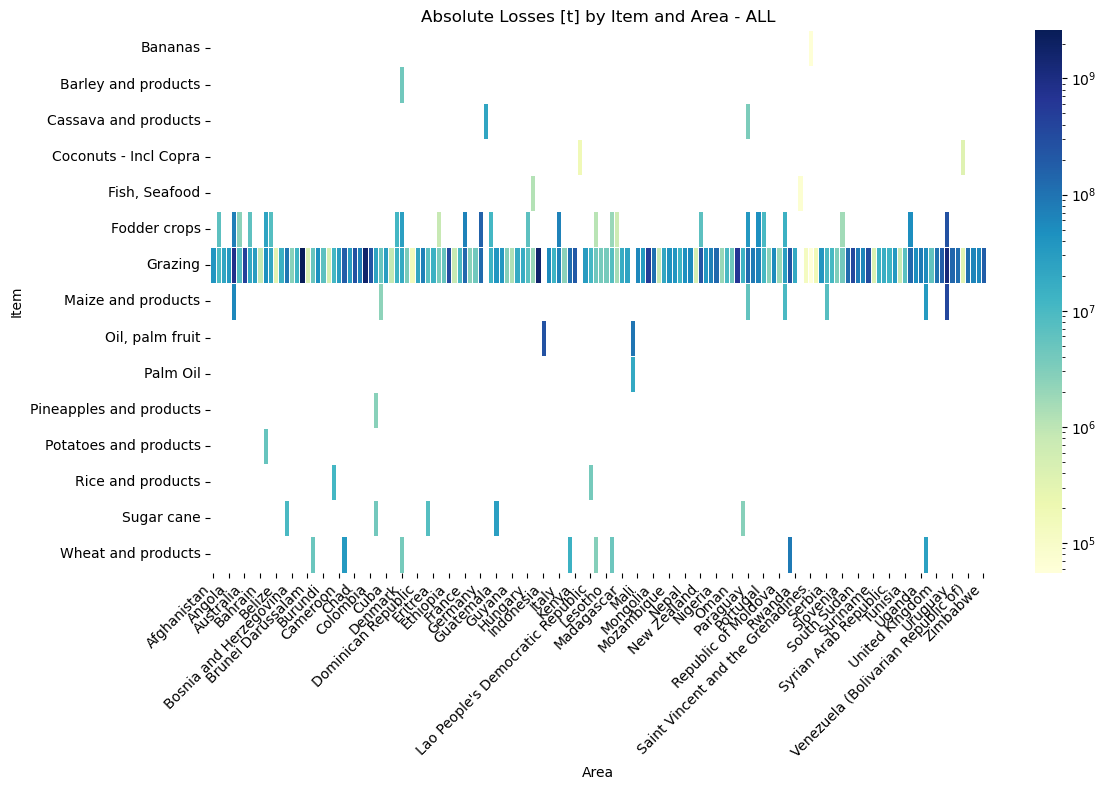

In [88]:
for i in range(len(scenario)):
    # Create pivot table
    pivot_table = df[i].pivot_table(
        index='item',
        columns='area',
        values='absolute_losses [t]',
        aggfunc='sum',
        fill_value=0
    )

    # Replace zeros with NaN for log scale
    masked_data = pivot_table.replace(0, np.nan)

    # Extract positive values to compute log scale limits
    positive_values = masked_data.values.flatten()
    positive_values = positive_values[~np.isnan(positive_values)]

    vmin = positive_values.min()
    vmax = positive_values.max()

    # Use a vivid color palette
    cmap = sns.color_palette("YlGnBu", as_cmap=True)
    cmap.set_bad(color='white')  # Hide NaNs in white

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        masked_data,
        cmap=cmap,
        norm=mcolors.LogNorm(vmin=vmin, vmax=vmax),
        linewidths=0.5
    )

    title = f"Absolute Losses [t] by Item and Area - {scenario[i]}"
    plt.title(title)
    plt.xlabel("Area")
    plt.ylabel("Item")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Save plot as .png
    filename = f"{title.replace(' ', '_').replace('[t]', 't').replace('/', '-')}.png"
    filepath = os.path.join(output_dir, filename)
    plt.savefig(filepath, dpi=300)
    plt.show()

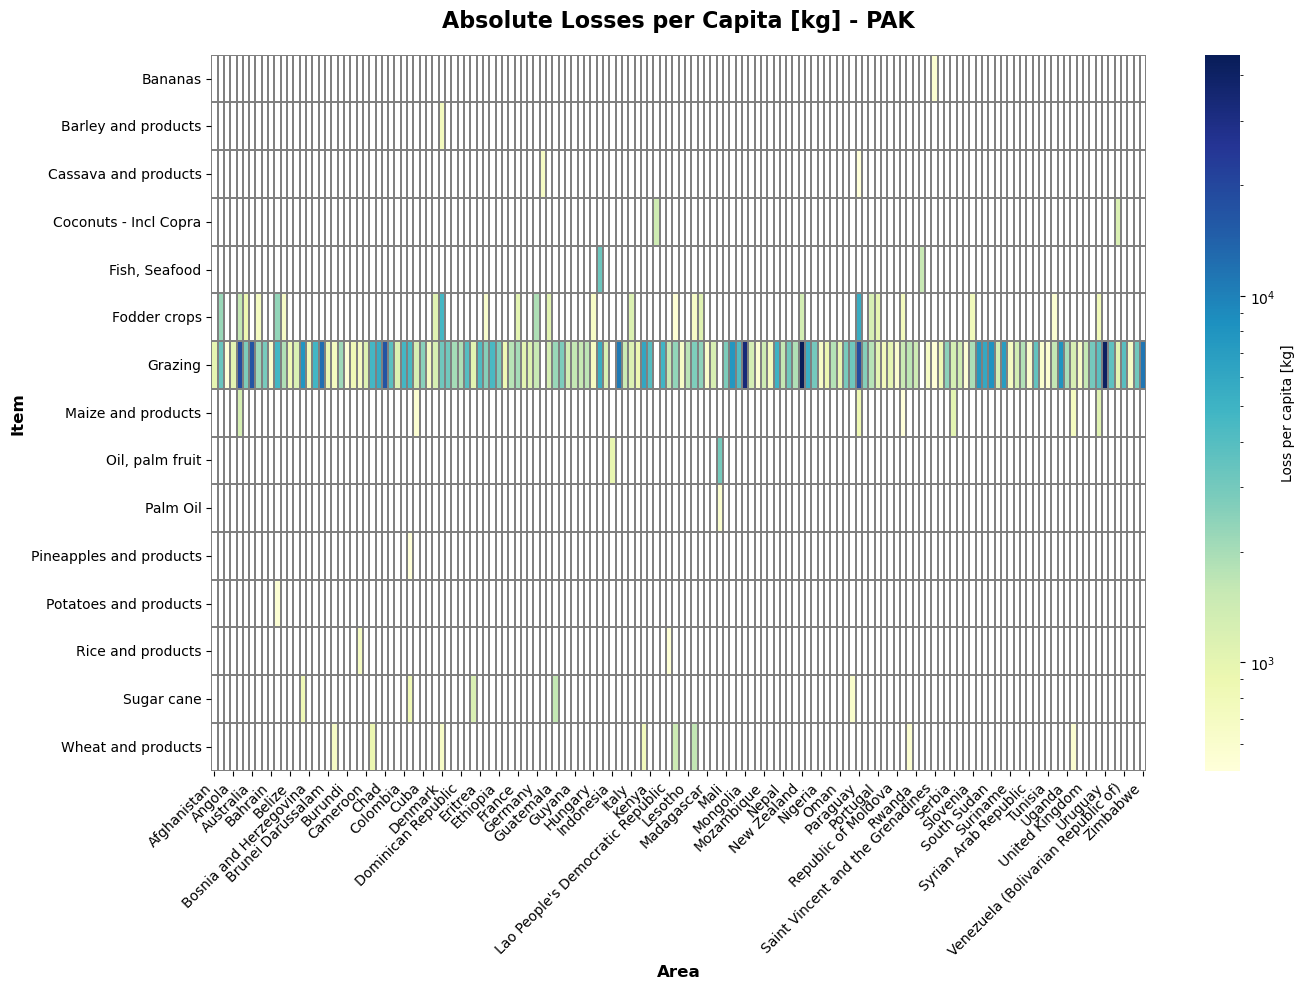

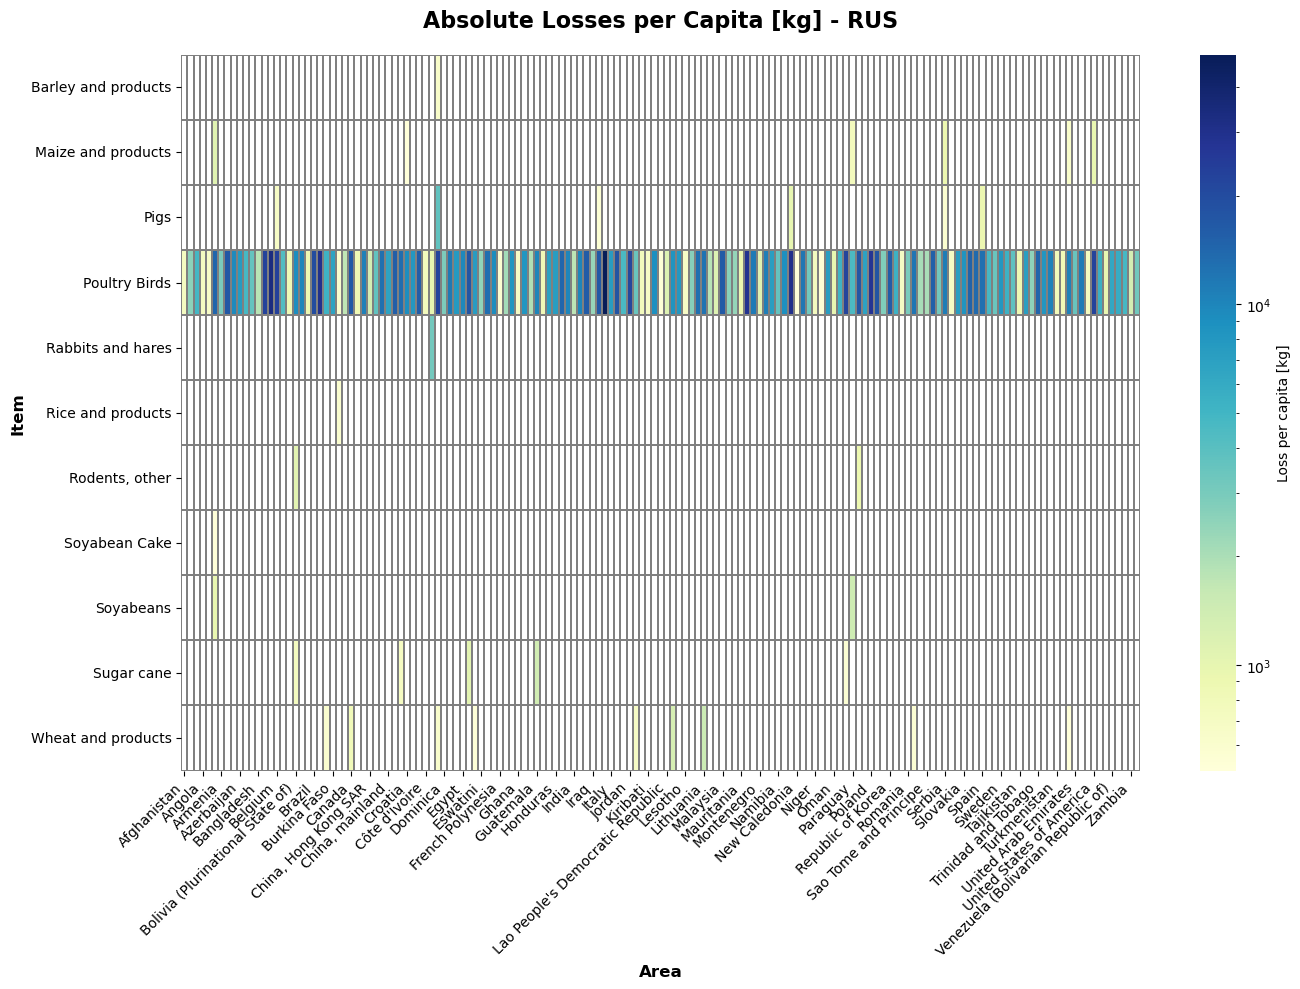

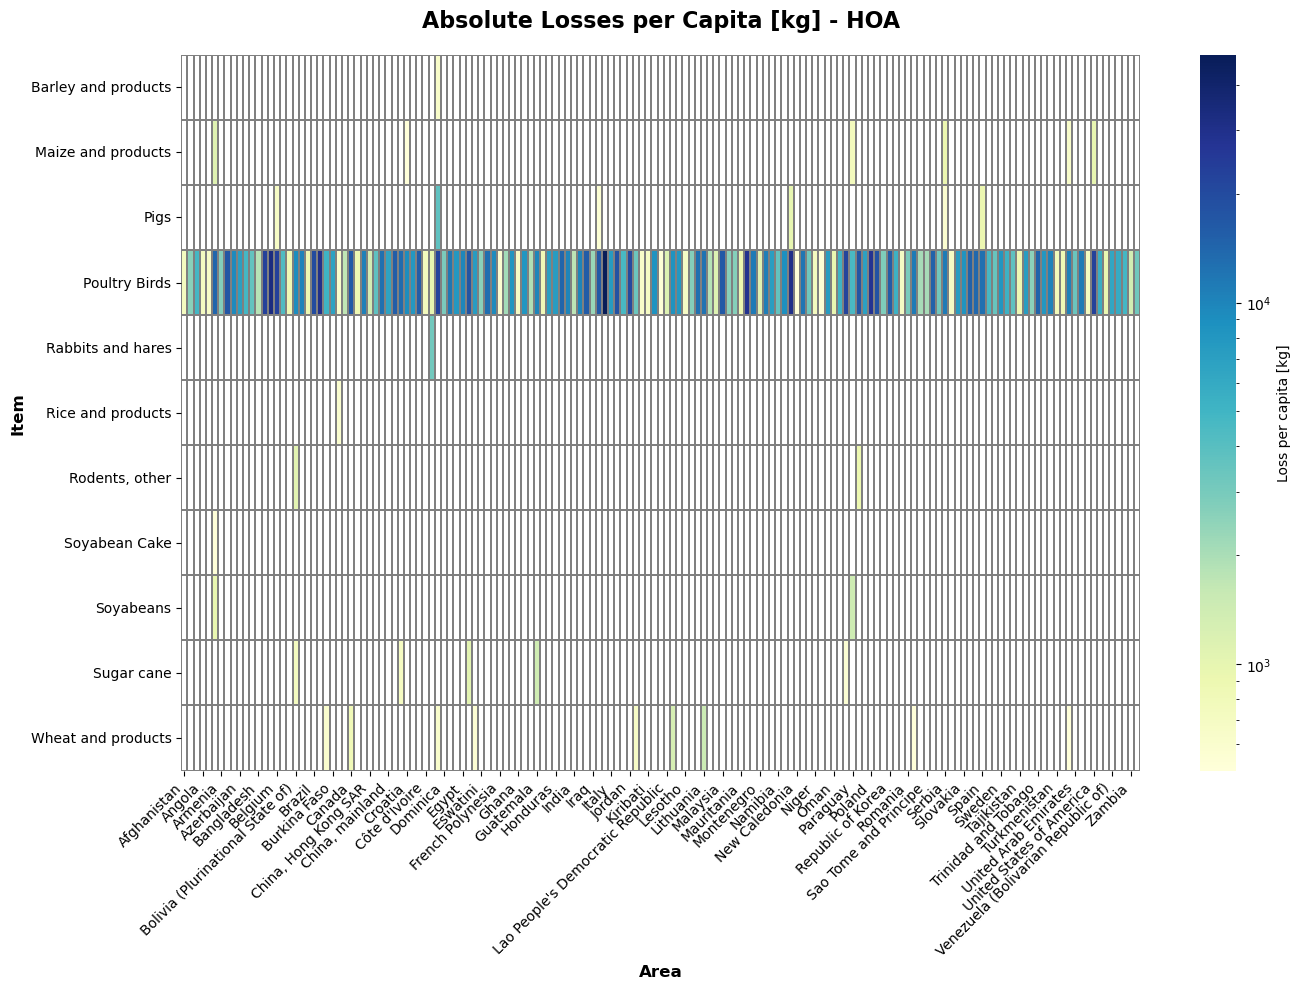

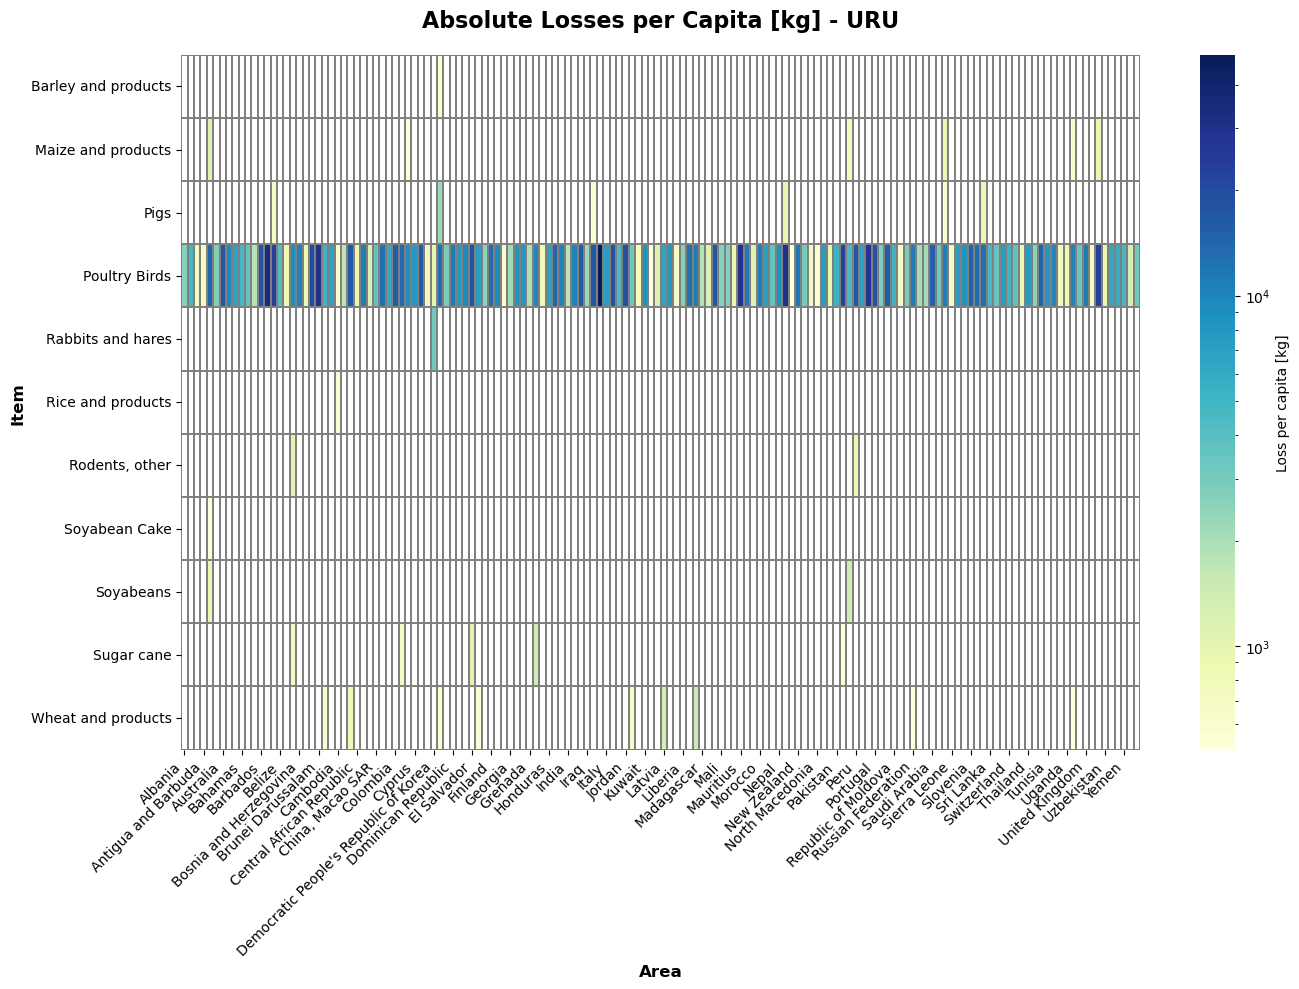

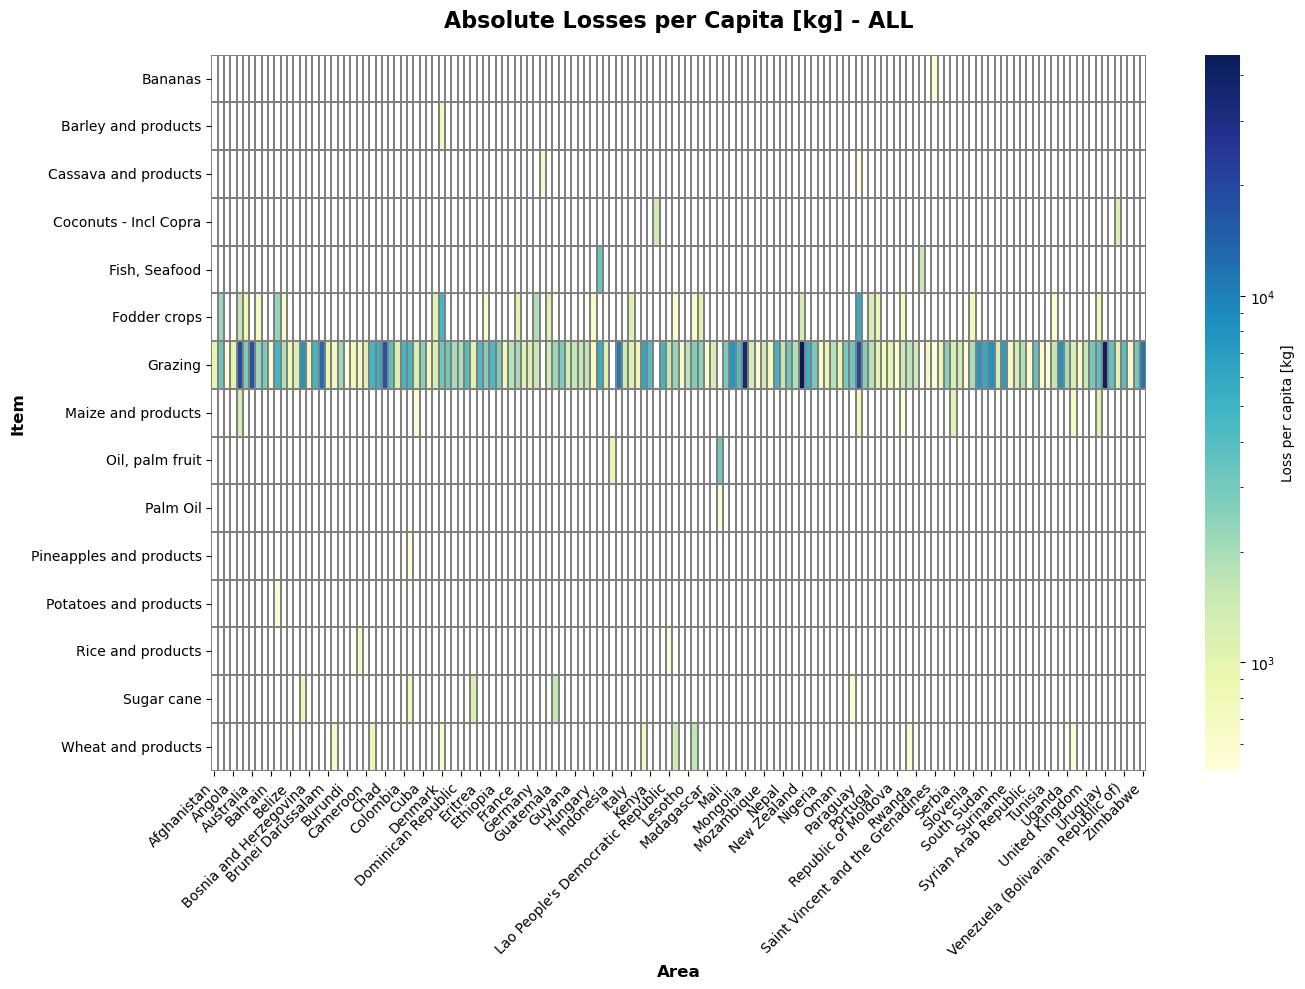

In [89]:
for i in range(len(scenario)):
    # Create pivot table
    pivot_table = df[i].pivot_table(
        index='item',
        columns='area',
        values='al/capita [kg]',
        aggfunc='sum',
        fill_value=0
    )
    
    # Replace zeros with NaN for better log scale visualization
    masked_data = pivot_table.replace(0, np.nan)

    # Extract positive values to determine log scale range
    positive_values = masked_data.values.flatten()
    positive_values = positive_values[~np.isnan(positive_values)]
    
    vmin = positive_values.min() if len(positive_values) > 0 else 1
    vmax = positive_values.max() if len(positive_values) > 0 else 1

    # Choose a varied color palette
    cmap = sns.color_palette("YlGnBu", as_cmap=True)
    cmap.set_bad(color='white')  # NaNs as white

    # Plot heatmap with improved visuals
    plt.figure(figsize=(14, 10))
    ax = sns.heatmap(
        masked_data,
        cmap=cmap,
        norm=mcolors.LogNorm(vmin=vmin, vmax=vmax),
        linewidths=0.05,              # Make lines more visible
        linecolor='gray',          # Clearer cell borders
        cbar_kws={"label": "Loss per capita [kg]"},
    )

    # Improve axis labels
    ax.set_title(f"Absolute Losses per Capita [kg] - {scenario[i]}", fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel("Area", fontsize=12, fontweight='bold')
    ax.set_ylabel("Item", fontsize=12, fontweight='bold')

    # Improve tick label formatting
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

    plt.tight_layout()

    # Save figure
    filename = f"losses_per_capita_{scenario[i].replace(' ', '_')}.png"
    plt.savefig(os.path.join(output_dir, filename), dpi=300)
    plt.show()

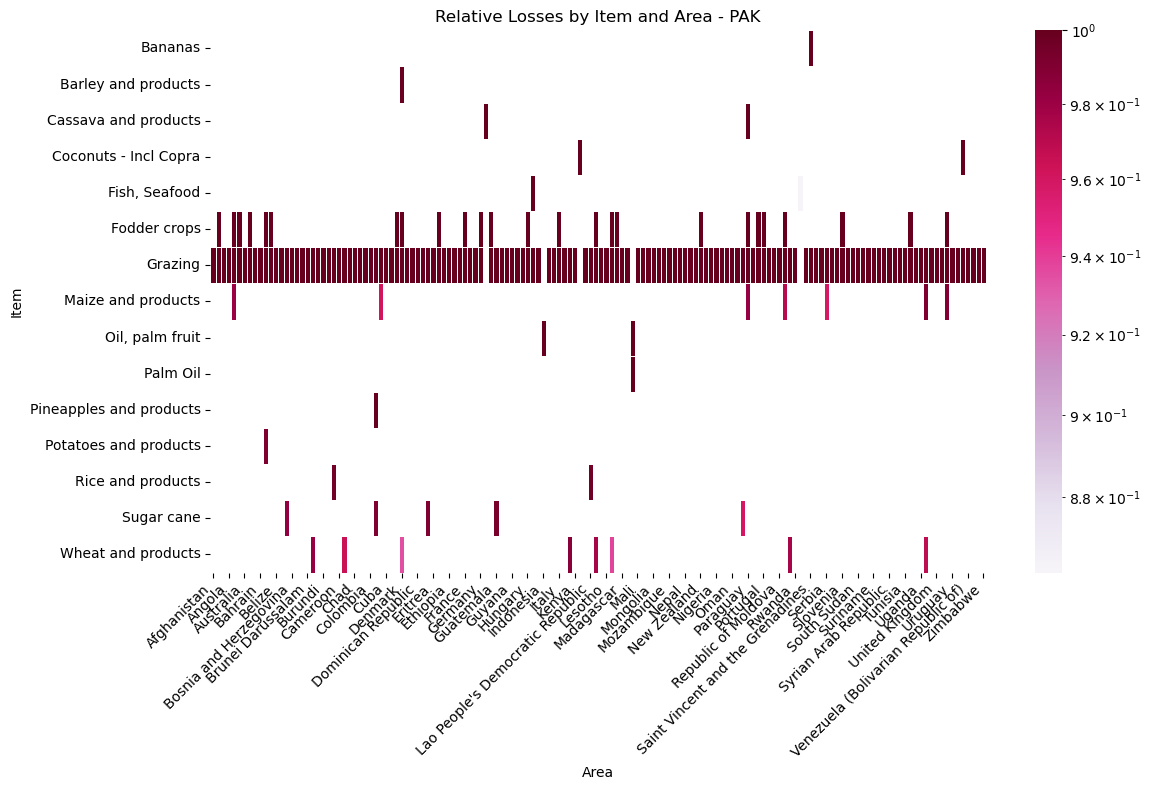

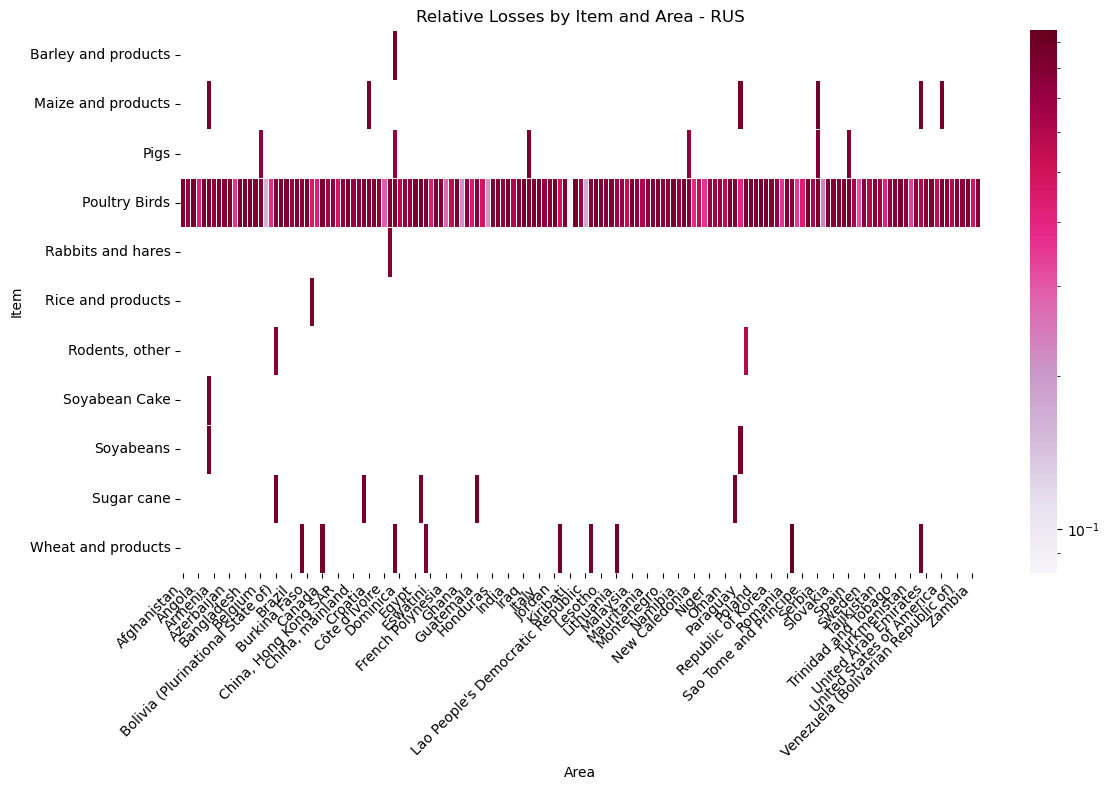

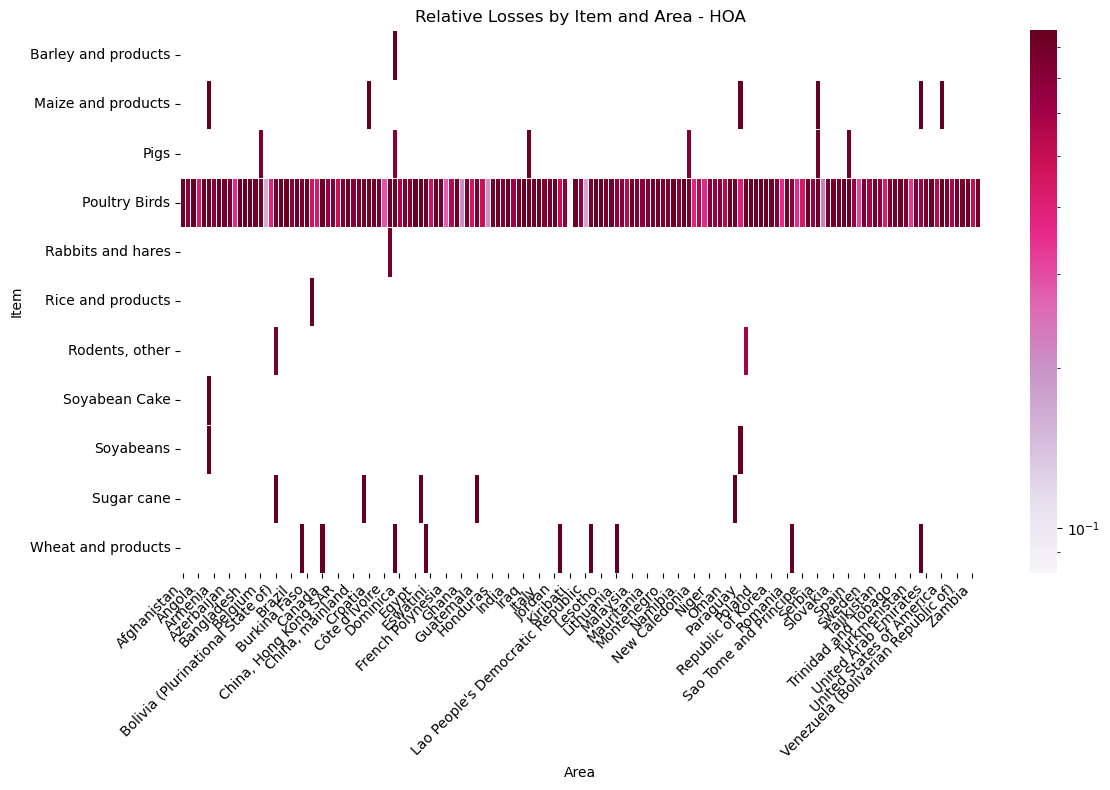

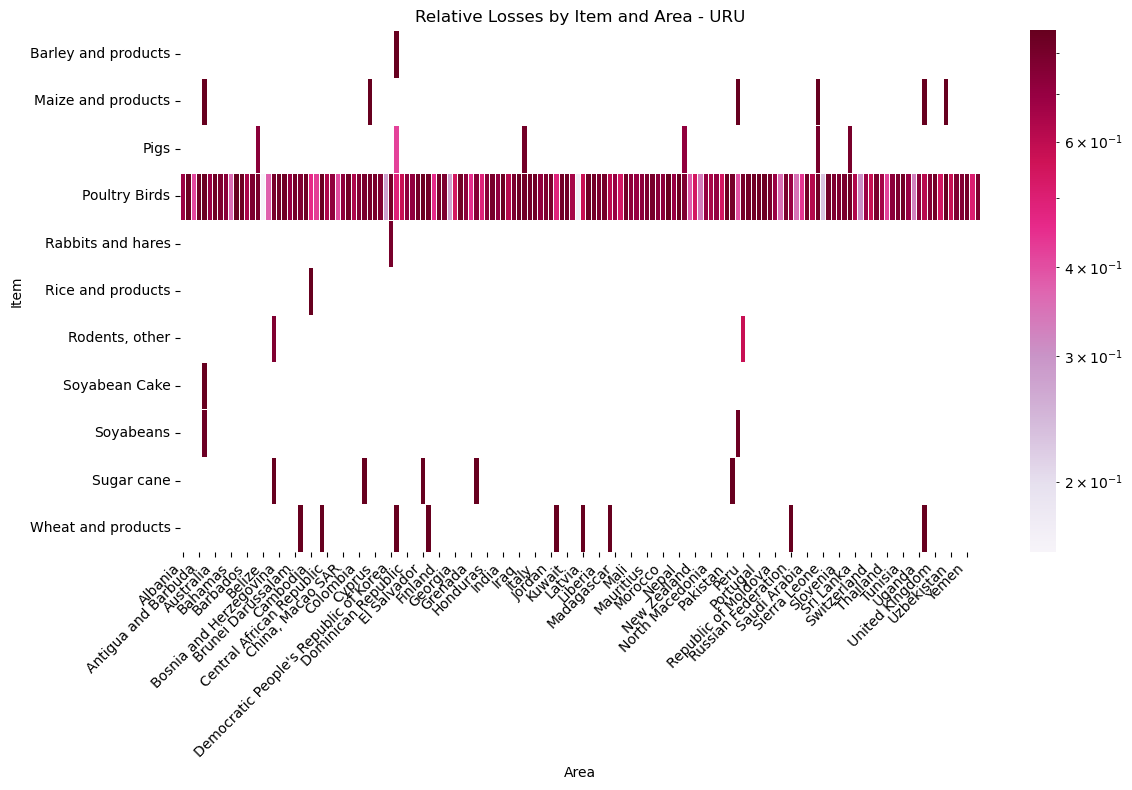

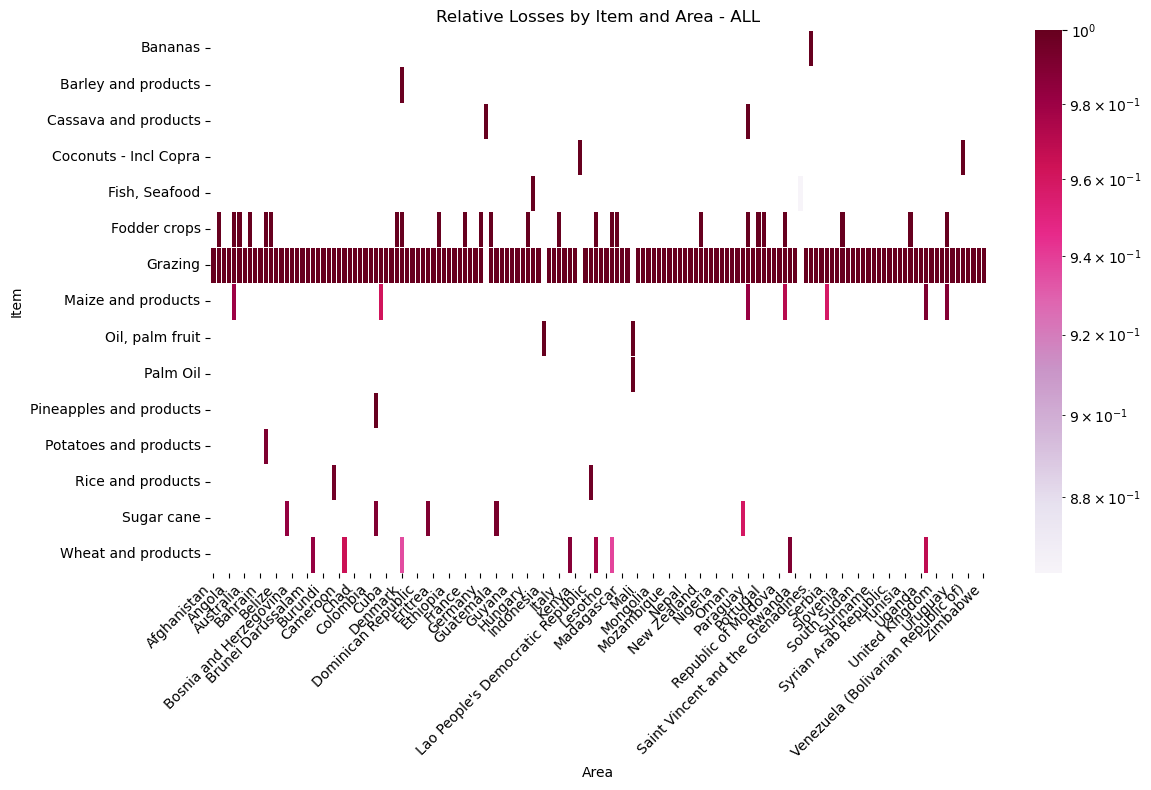

In [90]:
for i in range(len(scenario)):
    pivot_table = df[i].pivot_table(
        index='item',
        columns='area',
        values='relative_losses',
        aggfunc='sum',
        fill_value=0
    )
    
    masked_data = pivot_table.replace(0, np.nan)

    positive_values = masked_data.values.flatten()
    positive_values = positive_values[~np.isnan(positive_values)]
    
    vmin = positive_values.min() if len(positive_values) > 0 else 1e-6
    vmax = positive_values.max() if len(positive_values) > 0 else 1

    cmap = sns.color_palette("PuRd", as_cmap=True)
    cmap.set_bad(color='white')
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        masked_data,
        cmap=cmap,
        norm=mcolors.LogNorm(vmin=vmin, vmax=vmax),
        linewidths=0.5
    )
    plot_title = f"Relative Losses by Item and Area - {scenario[i]}"
    plt.title(plot_title)
    plt.xlabel("Area")
    plt.ylabel("Item")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Save figure
    filename = f"relative_losses_{scenario[i].replace(' ', '_')}.png"
    plt.savefig(os.path.join(output_dir, filename), dpi=300)
    plt.show()

# Absolute Profits

Scenario: PAK, vmin=1.000732099587111, vmax=14683026790.42559


/var/folders/fc/k0ssmt390m779swj1xmy_6lw0000gn/T/ipykernel_7133/3486380191.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("YlGnBu").copy()


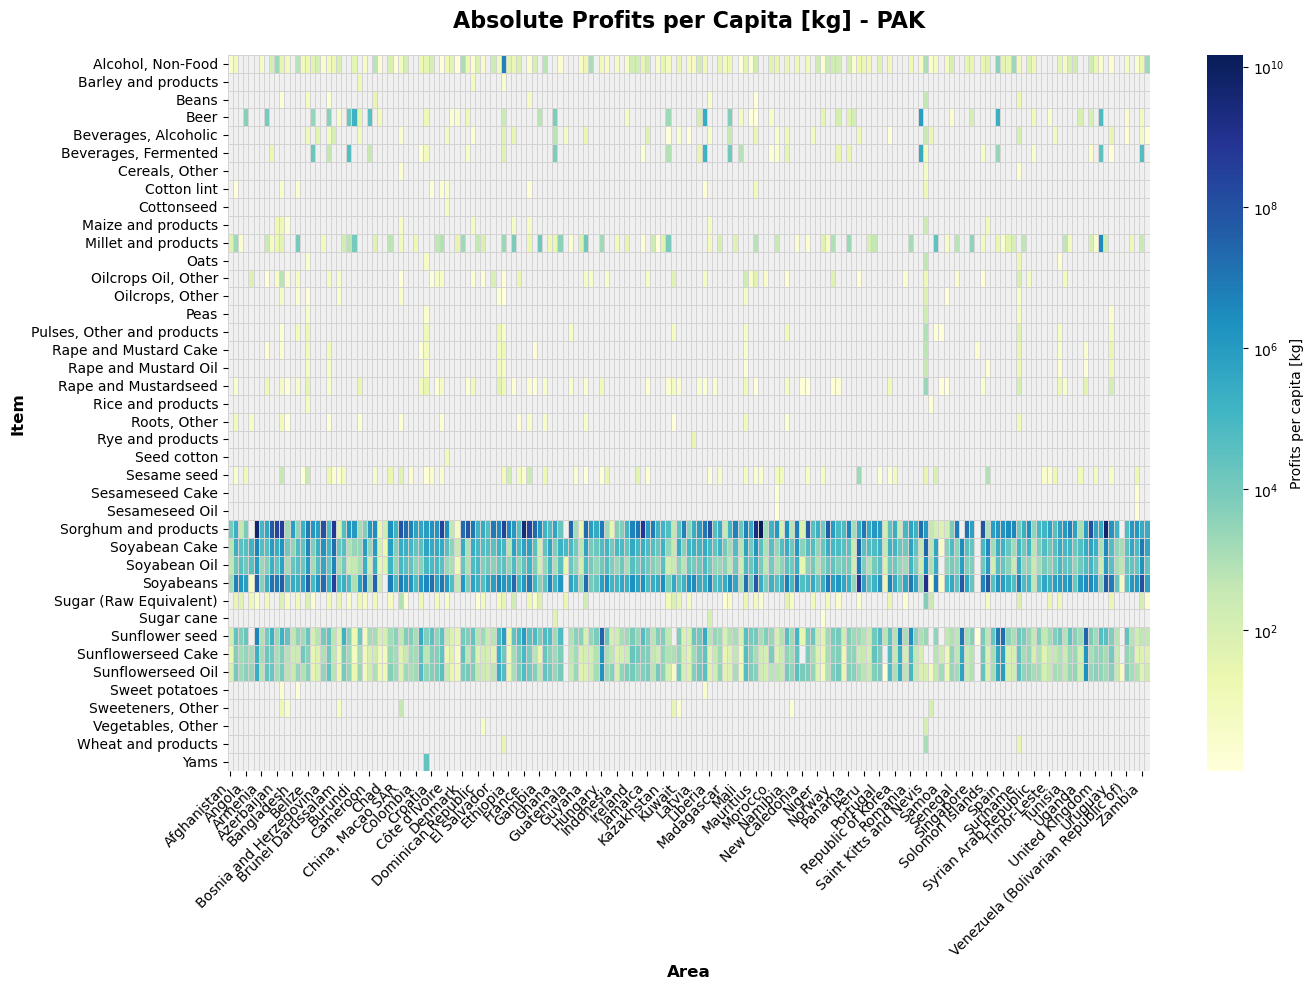

Scenario: RUS, vmin=1.070730865514924, vmax=38.17125694173224


/var/folders/fc/k0ssmt390m779swj1xmy_6lw0000gn/T/ipykernel_7133/3486380191.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("YlGnBu").copy()


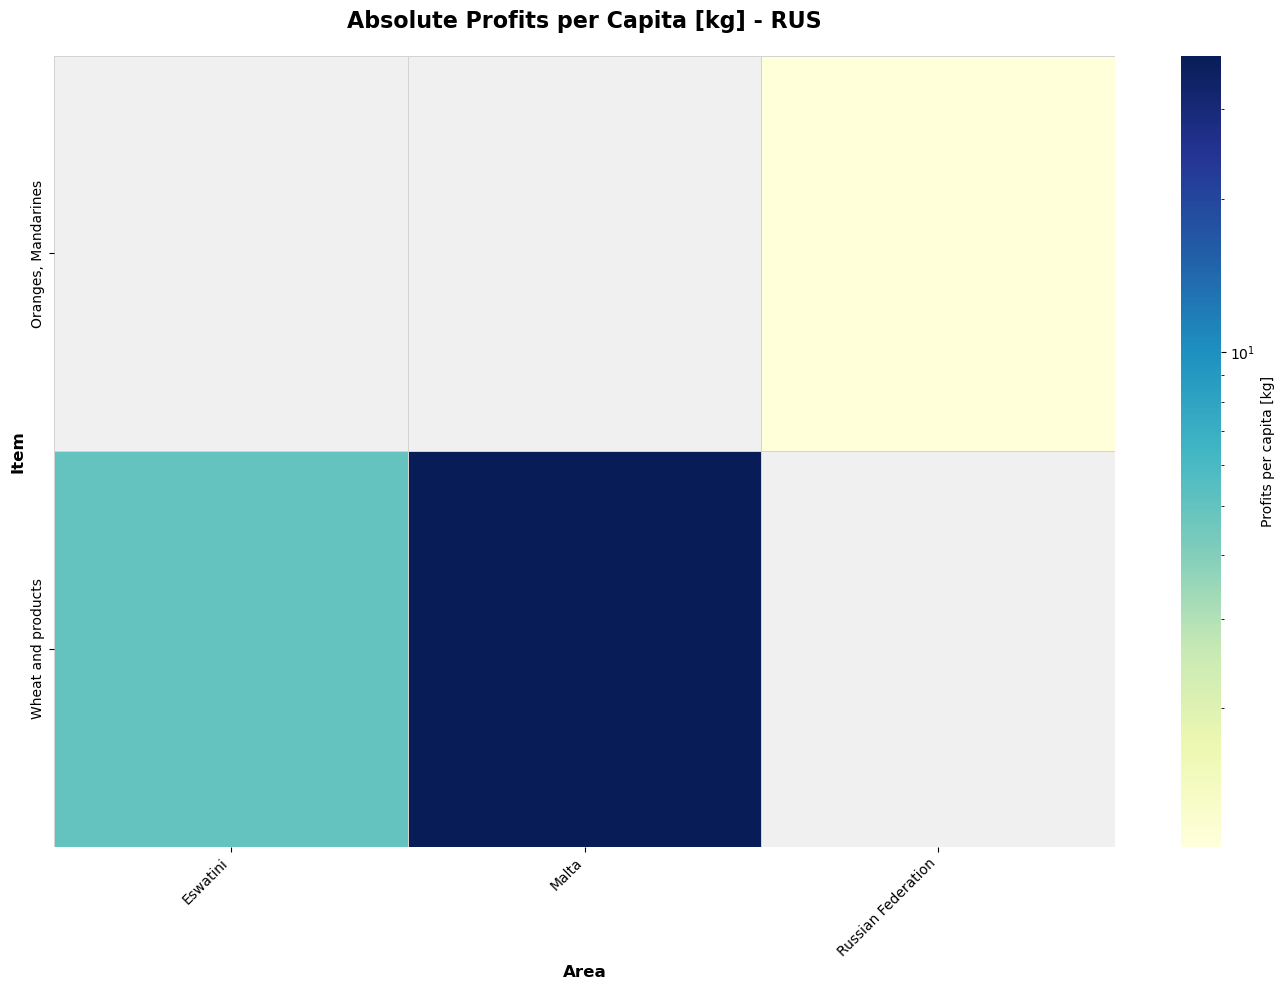

Scenario: HOA, vmin=1.161832289806817, vmax=245.2266340396126


/var/folders/fc/k0ssmt390m779swj1xmy_6lw0000gn/T/ipykernel_7133/3486380191.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("YlGnBu").copy()


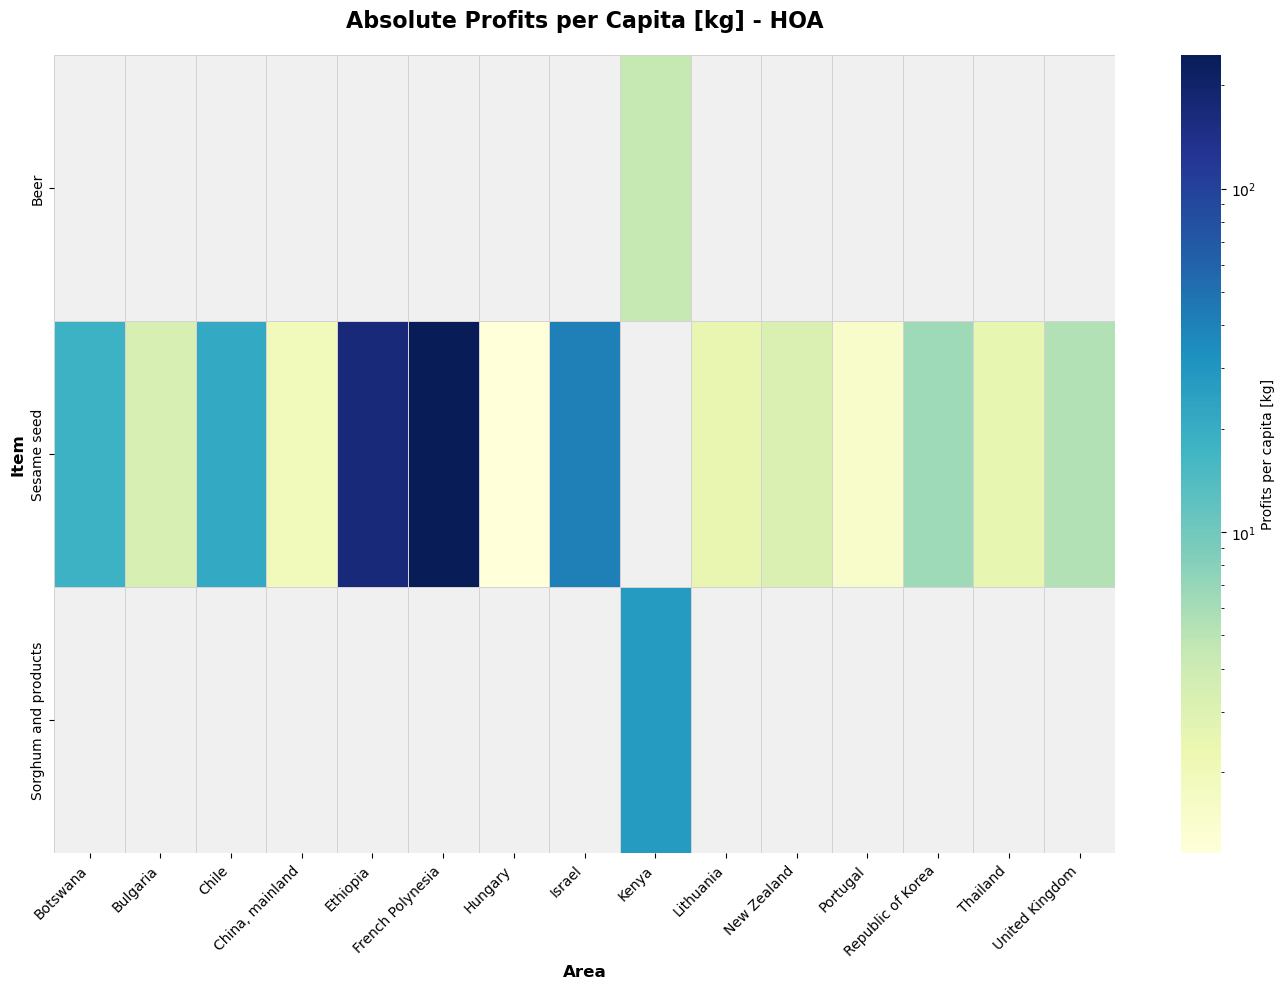

Scenario: URU, vmin=1.103078986266583, vmax=1343903.340086405


/var/folders/fc/k0ssmt390m779swj1xmy_6lw0000gn/T/ipykernel_7133/3486380191.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("YlGnBu").copy()


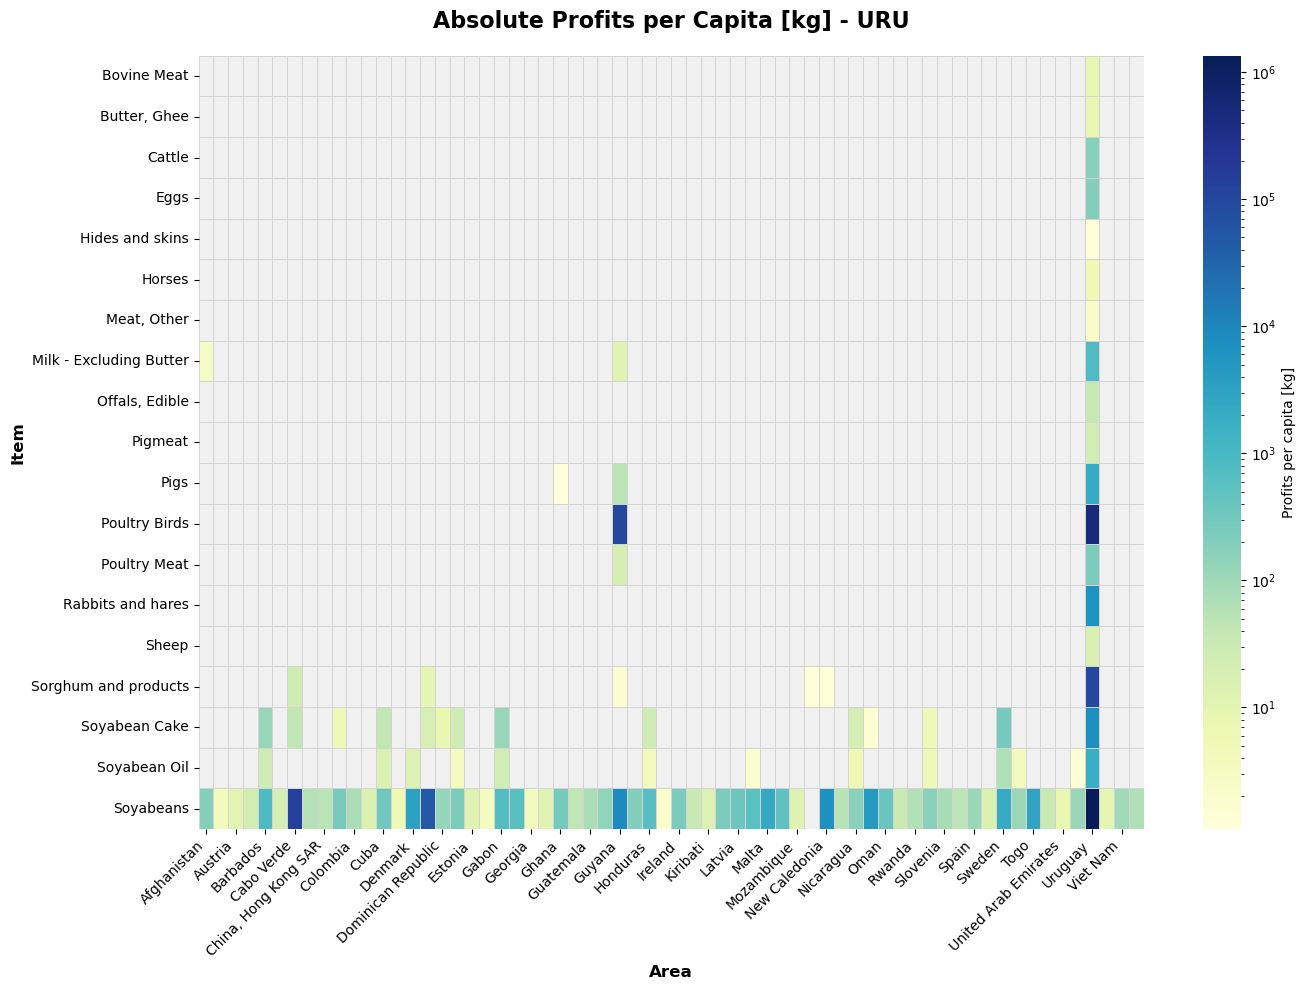

Scenario: ALL, vmin=1.0002189283885896, vmax=14722333703.18565


/var/folders/fc/k0ssmt390m779swj1xmy_6lw0000gn/T/ipykernel_7133/3486380191.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("YlGnBu").copy()


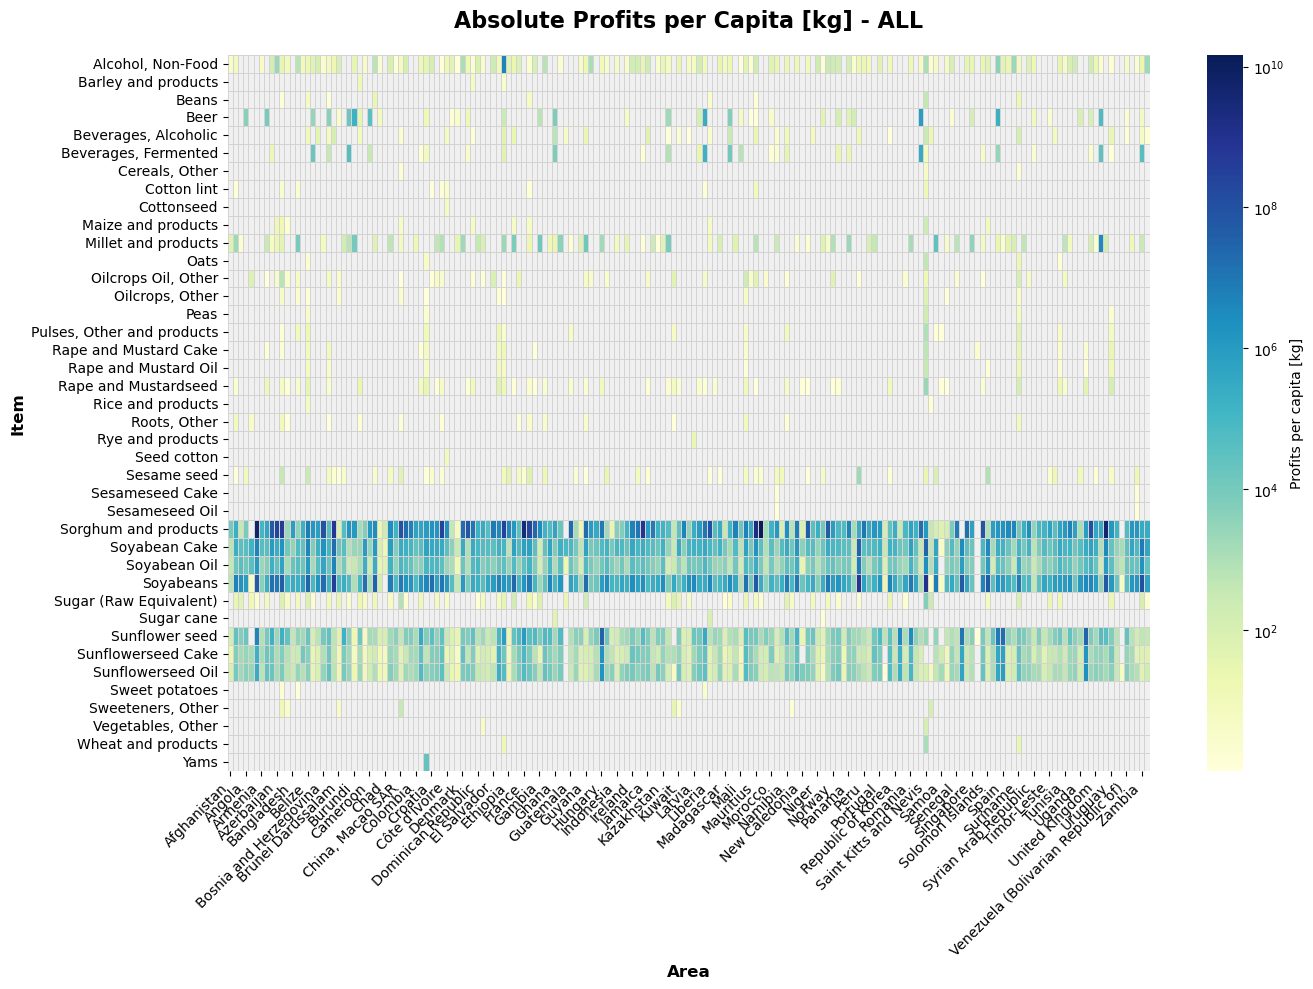

In [91]:
df = [pd.read_csv(scenario[i] + '-highestProfits.csv') for i in range(len(scenario))]

for i in range(len(scenario)):
    pivot_table = df[i].pivot_table(
        index='item',
        columns='area',
        values='al/capita [kg]',
        aggfunc='sum',
        fill_value=0
    )

    # Replace 0 with NaN and take absolute values to handle negatives
    masked_data = pivot_table.replace(0, np.nan).abs()

    # Flatten and filter to valid positive values for LogNorm
    positive_values = masked_data.values.flatten()
    positive_values = positive_values[~np.isnan(positive_values)]

    if len(positive_values) == 0:
        vmin, vmax = 1e-3, 1  # Fallback
    else:
        vmin = max(positive_values.min(), 1e-3)  # ensure strictly > 0
        vmax = positive_values.max()
        if vmin >= vmax:
            vmax = vmin * 10

    print(f"Scenario: {scenario[i]}, vmin={vmin}, vmax={vmax}")

    cmap = cm.get_cmap("YlGnBu").copy()
    cmap.set_bad(color='#f0f0f0')  # light gray for NaNs

    plt.figure(figsize=(14, 10))
    ax = sns.heatmap(
        masked_data,
        cmap=cmap,
        norm=LogNorm(vmin=vmin, vmax=vmax),
        linewidths=0.5,
        linecolor='lightgray',
        cbar_kws={"label": "Profits per capita [kg]"},
    )

    ax.set_title(f"Absolute Profits per Capita [kg] - {scenario[i]}", fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel("Area", fontsize=12, fontweight='bold')
    ax.set_ylabel("Item", fontsize=12, fontweight='bold')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

    plt.tight_layout()
    filename = f"profits_per_capita_{scenario[i].replace(' ', '_')}.png"
    plt.savefig(os.path.join(output_dir, filename), dpi=300)
    plt.show()